# Sine wave classifier

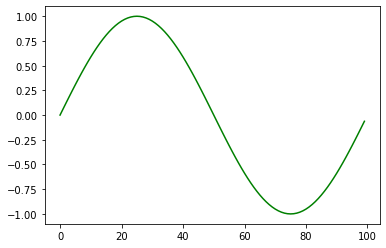

[0.0, 0.06279051952931337, 0.12533323356430426, 0.1873813145857246, 0.2486898871648548, 0.3090169943749474, 0.3681245526846779, 0.42577929156507266, 0.4817536741017153, 0.5358267949789967, 0.5877852522924731, 0.6374239897486896, 0.6845471059286886, 0.7289686274214116, 0.7705132427757891, 0.8090169943749473, 0.8443279255020151, 0.8763066800438637, 0.9048270524660196, 0.9297764858882513, 0.9510565162951535, 0.9685831611286311, 0.9822872507286886, 0.9921147013144778, 0.9980267284282716, 1.0, 0.9980267284282716, 0.9921147013144779, 0.9822872507286887, 0.9685831611286311, 0.9510565162951536, 0.9297764858882515, 0.9048270524660195, 0.8763066800438635, 0.844327925502015, 0.8090169943749475, 0.7705132427757893, 0.7289686274214116, 0.6845471059286888, 0.6374239897486899, 0.5877852522924732, 0.535826794978997, 0.4817536741017152, 0.4257792915650729, 0.36812455268467814, 0.3090169943749475, 0.24868988716485524, 0.18738131458572455, 0.12533323356430454, 0.06279051952931358, 1.2246467991473532e-16,

In [1]:
import math
import matplotlib.pyplot as plt
from IPython.display import display, clear_output

ROWS = 100
sine_wave=[]

for i in range(ROWS):
    angle = (i * math.pi) / 50.0
    sine_value = math.sin(angle)
    sine_wave.append(sine_value)
    
    clear_output(wait = True)
    plt.cla
    plt.plot(sine_wave, color='green')
    plt.show()

print(sine_wave)

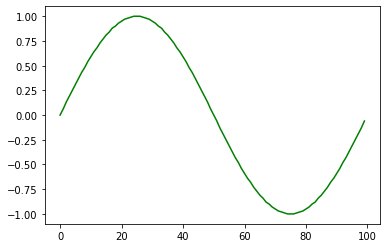

[0.0, 0.06, 0.13, 0.19, 0.25, 0.31, 0.37, 0.43, 0.48, 0.54, 0.59, 0.64, 0.68, 0.73, 0.77, 0.81, 0.84, 0.88, 0.9, 0.93, 0.95, 0.97, 0.98, 0.99, 1.0, 1.0, 1.0, 0.99, 0.98, 0.97, 0.95, 0.93, 0.9, 0.88, 0.84, 0.81, 0.77, 0.73, 0.68, 0.64, 0.59, 0.54, 0.48, 0.43, 0.37, 0.31, 0.25, 0.19, 0.13, 0.06, 0.0, -0.06, -0.13, -0.19, -0.25, -0.31, -0.37, -0.43, -0.48, -0.54, -0.59, -0.64, -0.68, -0.73, -0.77, -0.81, -0.84, -0.88, -0.9, -0.93, -0.95, -0.97, -0.98, -0.99, -1.0, -1.0, -1.0, -0.99, -0.98, -0.97, -0.95, -0.93, -0.9, -0.88, -0.84, -0.81, -0.77, -0.73, -0.68, -0.64, -0.59, -0.54, -0.48, -0.43, -0.37, -0.31, -0.25, -0.19, -0.13, -0.06]


In [2]:
import math
import matplotlib.pyplot as plt
from IPython.display import display, clear_output

ROWS = 100
sine_wave=[]

for i in range(ROWS):
    angle = (i * math.pi) / 50.0
    sine_value = math.sin(angle)
    sine_wave.append(round(sine_value,2))
    
    clear_output(wait = True)
    plt.cla
    plt.plot(sine_wave, color='green')
    plt.show()

print(sine_wave)

In [3]:
import math
import numpy as np

from htm.bindings.sdr import SDR
from htm.bindings.encoders import ScalarEncoder, ScalarEncoderParameters
from htm.algorithms import SpatialPooler as SP
from htm.algorithms import TemporalMemory as TM
from htm.bindings.algorithms import Classifier

import matplotlib.pyplot as plt
from IPython.display import display, clear_output

In [4]:
scalarEncoderParams = ScalarEncoderParameters()
scalarEncoderParams.minimum = -1
scalarEncoderParams.maximum = 1
scalarEncoderParams.activeBits = 4
scalarEncoderParams.size = 128
scalarEncoderParams.clipInput  = True

enc = ScalarEncoder(scalarEncoderParams)

print ("1.0: ", enc.encode(1.0))
print ("0.9: ", enc.encode(0.9))
print ("0.5: ", enc.encode(0.5))
print ("0.1: ", enc.encode(0.1))
print ("0.01: ", enc.encode(0.01))
print ("0.0: ", enc.encode(0.0))
print ("-0.1: ", enc.encode(-0.1))
print ("-0.5: ", enc.encode(-0.5))
print ("-0.9: ", enc.encode(-0.9))
print ("-1.0: ", enc.encode(-1.0))

1.0:  SDR( 128 ) 124, 125, 126, 127
0.9:  SDR( 128 ) 118, 119, 120, 121
0.5:  SDR( 128 ) 93, 94, 95, 96
0.1:  SDR( 128 ) 68, 69, 70, 71
0.01:  SDR( 128 ) 63, 64, 65, 66
0.0:  SDR( 128 ) 62, 63, 64, 65
-0.1:  SDR( 128 ) 56, 57, 58, 59
-0.5:  SDR( 128 ) 31, 32, 33, 34
-0.9:  SDR( 128 ) 6, 7, 8, 9
-1.0:  SDR( 128 ) 0, 1, 2, 3


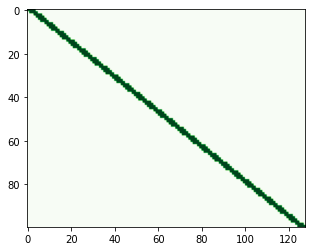

In [5]:
n_samples = 100

sdrs = []
for i in np.linspace(enc.parameters.minimum, enc.parameters.maximum, n_samples):
    sdrs.append( enc.encode( i ).dense )

    clear_output(wait = True)
    plt.cla
    plt.imshow(np.array(sdrs), cmap = "Greens")
    plt.show()

In [6]:
inputSDR  = SDR( dimensions = (128, ) )
activeSDR = SDR( dimensions = (576,) )
sp = SP(inputDimensions  = inputSDR.dimensions,
        columnDimensions = activeSDR.dimensions,
        localAreaDensity = 0.02,
        globalInhibition = True,
        seed             = 1,
        synPermActiveInc   = 0.01,
        synPermInactiveDec = 0.008)

print(sp)

Spatial Pooler Connections:
    Inputs (128) ~> Outputs (576) via Segments (576)
    Segments on Cell Min/Mean/Max 1 / 1 / 1
    Potential Synapses on Segment Min/Mean/Max 17 / 17 / 17
    Connected Synapses on Segment Min/Mean/Max 3 / 8.3941 / 15
    Synapses Dead (0%) Saturated (0%)
    Synapses pruned (0%) Segments pruned (0%)



In [7]:
tm = TM(
    columnDimensions = (576,),
    cellsPerColumn=8,
    initialPermanence=0.5,
    connectedPermanence=0.5,
    minThreshold=8,
    maxNewSynapseCount=20,
    permanenceIncrement=0.1,
    permanenceDecrement=0.0,
    activationThreshold=8,
)
print(tm)

Temporal Memory Connections:
    Inputs (0) ~> Outputs (4608) via Segments (0)
    Segments on Cell Min/Mean/Max 0 / 0 / 0
    Potential Synapses on Segment Min/Mean/Max 4294967295 / nan / 0
    Connected Synapses on Segment Min/Mean/Max 65535 / nan / 0
    Synapses Dead (nan%) Saturated (nan%)
    Synapses pruned (nan%) Segments pruned (nan%)



In [8]:
minimum = -1
resolution = 0.01
clsr = Classifier()

In [9]:
ROWS = 100
seq =[]

for i in range(ROWS):
    angle = (i * math.pi) / 50.0
    sine_value = math.sin(angle)
    seq .append(round(sine_value,2) )

seq_clsr = Classifier()
print(seq)

[0.0, 0.06, 0.13, 0.19, 0.25, 0.31, 0.37, 0.43, 0.48, 0.54, 0.59, 0.64, 0.68, 0.73, 0.77, 0.81, 0.84, 0.88, 0.9, 0.93, 0.95, 0.97, 0.98, 0.99, 1.0, 1.0, 1.0, 0.99, 0.98, 0.97, 0.95, 0.93, 0.9, 0.88, 0.84, 0.81, 0.77, 0.73, 0.68, 0.64, 0.59, 0.54, 0.48, 0.43, 0.37, 0.31, 0.25, 0.19, 0.13, 0.06, 0.0, -0.06, -0.13, -0.19, -0.25, -0.31, -0.37, -0.43, -0.48, -0.54, -0.59, -0.64, -0.68, -0.73, -0.77, -0.81, -0.84, -0.88, -0.9, -0.93, -0.95, -0.97, -0.98, -0.99, -1.0, -1.0, -1.0, -0.99, -0.98, -0.97, -0.95, -0.93, -0.9, -0.88, -0.84, -0.81, -0.77, -0.73, -0.68, -0.64, -0.59, -0.54, -0.48, -0.43, -0.37, -0.31, -0.25, -0.19, -0.13, -0.06]


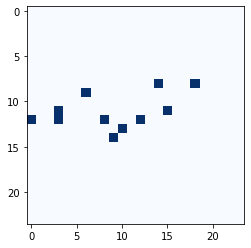

[0.0, 0.06000000000000005, 0.1200000000000001, 0.17999999999999994, 0.25, 0.31000000000000005, 0.3700000000000001, 0.42999999999999994, 0.48, 0.54, 0.5800000000000001, 0.6400000000000001, 0.6799999999999999, 0.73, 0.77, 0.81, 0.8300000000000001, 0.8700000000000001, 0.9000000000000001, 0.9299999999999999, 0.95, 0.97, 0.98, 0.99, 1.0, 1.0, 1.0, 0.99, 0.99, 0.97, 0.95, 0.9299999999999999, 0.9000000000000001, 0.8700000000000001, 0.8300000000000001, 0.81, 0.77, 0.73, 0.6799999999999999, 0.6400000000000001, 0.5800000000000001, 0.54, 0.48, 0.42999999999999994, 0.3700000000000001, 0.31000000000000005, 0.25, 0.17999999999999994, 0.1200000000000001, 0.06000000000000005, 0.0, -0.06999999999999995, -0.13, -0.18999999999999995, -0.25, -0.30999999999999994, -0.37, -0.42999999999999994, -0.48, -0.55, -0.59, -0.64, -0.69, -0.73, -0.78, -0.8200000000000001, -0.84, -0.88, -0.91, -0.94, -0.95, -0.97, -0.98, -0.99, -1.0, -1.0, -1.0, -0.99, -0.98, -0.97, -0.95, -0.94, -0.91, -0.88, -0.84, -0.82000000000000

In [10]:
sine_wave=[]
for i in range(len(seq)):    
    scalar = seq[i]
    #print("input:",scalar)
    inputSDR = enc.encode(scalar)
    #print("input SDR: ",inputSDR)
    sp.compute(inputSDR, True, activeSDR)
    #print("Active SDR: ",activeSDR)
    
    clear_output(wait = True)
    plt.cla
    sampleSDR=activeSDR.dense.reshape(24,24)
    plt.imshow(sampleSDR, cmap = "Blues")
    plt.pause(0.01)

    clsr.learn( activeSDR, int((scalar - minimum) / resolution)  )
    sin_sdr = np.argmax( clsr.infer( activeSDR) )  * resolution + minimum
    #print("output:",sin_sdr)
    sine_wave.append(sin_sdr)
    
    #clear_output(wait = True)
    #plt.cla
    #plt.plot(sine_wave)
    #plt.show()

print(sine_wave)

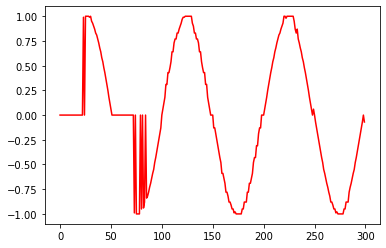

In [11]:
sine_wave=[]
batch=3
for n in range(batch):    
    for i in range(len(seq)):
        inputSDR = enc.encode(seq[i])
        print("input SDR: ",inputSDR)
        sp.compute(inputSDR, True, activeSDR)
        print("Active SDR: ",activeSDR)
        #seq_clsr.learn( activeSDR, i )
        #print("Classifier learn: ",i)
        print("")

        #sampleSDR=activeSDR.dense.reshape(24,24)
        #plt.imshow(sampleSDR, cmap = "Blues")
        #plt.pause(0.01)

        tm.compute( activeSDR, learn=True)
        tm.activateDendrites(True)

        activeColumnsIndices   = [tm.columnForCell(i) for i in tm.getActiveCells().sparse]
        predictedColumnIndices = [tm.columnForCell(i) for i in tm.getPredictiveCells().sparse]

        #print(tm.getActiveCells())
        #print(tm.getPredictiveCells())

        active_sdr = SDR( tm.numberOfColumns() )
        active_sdr.sparse  = np.array(sorted(set(activeColumnsIndices)))
        print("-"*70 )
        print("Active sdr: ", active_sdr)

        predict_sdr = SDR( tm.numberOfColumns() )
        predict_sdr.sparse  = np.array(sorted(set(predictedColumnIndices)))
        print("-"*70 )
        print("Predicted sdr: ",predict_sdr)

        if  len(predict_sdr.sparse) == 0:
            tm_predict = 0
        else:
            clsr.learn( predict_sdr, int((seq[i] - minimum) / resolution)  )
            tm_predict = np.argmax( clsr.infer( predict_sdr) )  * resolution + minimum
        print("-"*70 )
        #print("PDF: ",clsr.infer( predict_sdr) )
        print("-"*70 )

        print("predict sine_wave: ",tm_predict)

        print("")

        
        sine_wave.append(tm_predict )

        clear_output(wait = True)
        plt.cla        
        plt.plot(sine_wave, color='red')
        plt.show()

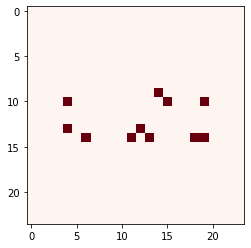

In [12]:
for i in range(len(seq)):
    print("--- ", i ," ---")
    inputSDR = enc.encode(seq[i])
    print("input SDR: ",inputSDR)
    sp.compute(inputSDR, True, activeSDR)
    print("Active SDR: ",activeSDR)
    print("")

    #sampleSDR=activeSDR.dense.reshape(36,64)
    #plt.imshow(sampleSDR, cmap = "Blues")
    #plt.pause(0.01)

    tm.compute( activeSDR, learn=False)
    tm.activateDendrites(True)
    activeColumnsIndices   = [tm.columnForCell(i) for i in tm.getActiveCells().sparse]
    predictedColumnIndices = [tm.columnForCell(i) for i in tm.getPredictiveCells().sparse]

    #print(tm.getActiveCells())
    #print(tm.getPredictiveCells())

    active_sdr = SDR( tm.numberOfColumns() )
    active_sdr.sparse  = np.array(sorted(set(activeColumnsIndices)))
    print("-"*70 )
    print("Active sdr: ", active_sdr)

    predict_sdr = SDR( tm.numberOfColumns() )
    predict_sdr.sparse  = np.array(sorted(set(predictedColumnIndices)))
    print("-"*70 )
    print("Predicted sdr: ",predict_sdr)

    if  len(predict_sdr.sparse) == 0:
        tm_predict = "nan"
        tm_pitchNames = "nan"      
    else:
        clsr.learn( predict_sdr, int((seq[i] - minimum) / resolution)  )
        tm_predict = np.argmax( clsr.infer( predict_sdr) )  * resolution + minimum

    print("-"*70 )
    #print("PDF: ",clsr.infer( predict_sdr) )
    print("-"*70 )

    print("predict sine_wave: ",tm_predict)

    print("")

    clear_output(wait = True)
    plt.cla
    sampleSDR=predict_sdr.dense.reshape(24,24)
    plt.imshow(sampleSDR, cmap = "Reds")
    plt.pause(0.01)

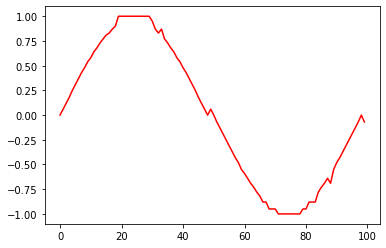

In [13]:
sine_wave=[]
for i in range(len(seq)):
    print("--- ", i ," ---")
    inputSDR = enc.encode(seq[i])
    print("input SDR: ",inputSDR)
    sp.compute(inputSDR, True, activeSDR)
    print("Active SDR: ",activeSDR)
    print("")

    #sampleSDR=activeSDR.dense.reshape(24,24)
    #plt.imshow(sampleSDR, cmap = "Blues")
    #plt.pause(0.01)

    tm.compute( activeSDR, learn=False)
    tm.activateDendrites(True)
    activeColumnsIndices   = [tm.columnForCell(i) for i in tm.getActiveCells().sparse]
    predictedColumnIndices = [tm.columnForCell(i) for i in tm.getPredictiveCells().sparse]

    #print(tm.getActiveCells())
    #print(tm.getPredictiveCells())

    active_sdr = SDR( tm.numberOfColumns() )
    active_sdr.sparse  = np.array(sorted(set(activeColumnsIndices)))
    print("-"*70 )
    print("Active sdr: ", active_sdr)

    predict_sdr = SDR( tm.numberOfColumns() )
    predict_sdr.sparse  = np.array(sorted(set(predictedColumnIndices)))
    print("-"*70 )
    print("Predicted sdr: ",predict_sdr)

    if  len(predict_sdr.sparse) == 0:
        tm_predict = "nan"
        tm_pitchNames = "nan"      
    else:
        clsr.learn( predict_sdr, int((seq[i] - minimum) / resolution)  )
        tm_predict = np.argmax( clsr.infer( predict_sdr) )  * resolution + minimum

    print("-"*70 )
    print("PDF: ",clsr.infer( predict_sdr) )
    print("-"*70 )

    print("predict sine_wave: ",tm_predict)

    print("")

    sine_wave.append(tm_predict )

    clear_output(wait = True)
    plt.cla
    plt.plot(sine_wave, color='red')
    plt.show()

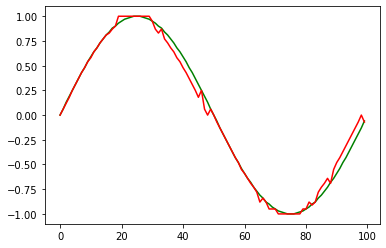

In [14]:
sine_wave_1=[]
sine_wave_2=[]
for i in range(len(seq)):
    print("--- ", i ," ---")
    inputSDR = enc.encode(seq[i])
    print("input SDR: ",inputSDR)
    sp.compute(inputSDR, True, activeSDR)
    print("Active SDR: ",activeSDR)
    print("")

    #sampleSDR=activeSDR.dense.reshape(24,24)
    #plt.imshow(sampleSDR, cmap = "Blues")
    #plt.pause(0.01)

    tm.compute( activeSDR, learn=False)
    tm.activateDendrites(True)
    activeColumnsIndices   = [tm.columnForCell(i) for i in tm.getActiveCells().sparse]
    predictedColumnIndices = [tm.columnForCell(i) for i in tm.getPredictiveCells().sparse]

    #print(tm.getActiveCells())
    #print(tm.getPredictiveCells())

    active_sdr = SDR( tm.numberOfColumns() )
    active_sdr.sparse  = np.array(sorted(set(activeColumnsIndices)))
    print("-"*70 )
    print("Active sdr: ", active_sdr)

    predict_sdr = SDR( tm.numberOfColumns() )
    predict_sdr.sparse  = np.array(sorted(set(predictedColumnIndices)))
    print("-"*70 )
    print("Predicted sdr: ",predict_sdr)

    if  len(predict_sdr.sparse) == 0:
        tm_predict = "nan"
        tm_pitchNames = "nan"      
    else:
        clsr.learn( predict_sdr, int((seq[i] - minimum) / resolution)  )
        tm_predict = np.argmax( clsr.infer( predict_sdr) )  * resolution + minimum

    print("-"*70 )
    print("PDF: ",clsr.infer( predict_sdr) )
    print("-"*70 )

    print("predict sine_wave: ",tm_predict)

    print("")

    sine_wave_1.append(seq[i])
    sine_wave_2.append(tm_predict )

    clear_output(wait = True)
    plt.cla
    plt.plot(sine_wave_1, color='green')
    plt.plot(sine_wave_2, color='red')
    plt.show()